## Football Predictor Model

In this notebook we develop a football match result predictor from scratch with sklearn library, testing differents models and compare performance of each one.

The idea is then use this model for a more complex system, create a API Rest

## Load, clean and Transform data

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn import metrics

In [38]:
df = pd.read_csv('dataset.csv')
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [39]:
df['result'] = df.apply(lambda x : 'win' if x.home_score > x.away_score else 'loose' if x.home_score < x.away_score else 'draw', axis=1)
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win


In [132]:
# dic = eval(df['home_team'].values)
teams = list(dict.fromkeys(df['home_team'].values.tolist() + df['away_team'].values.tolist()))
dic = { teams[i] : (i+1) for i in range(len(teams)) } 
df['home_team_id']= df['home_team'].map(dic) 
df['away_team_id']= df['away_team'].map(dic) 
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result,home_team_id,away_team_id
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw,1,2
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win,2,1
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win,1,2
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw,2,1
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win,1,2


In [42]:
X = df[ ['home_team_id', 'away_team_id'] ].values
X[0:5]

array([[1, 2],
       [2, 1],
       [1, 2],
       [2, 1],
       [1, 2]], dtype=int64)

In [43]:
y = df['result'].values
y[0:5]

array(['draw', 'win', 'win', 'draw', 'win'], dtype=object)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

classifier = []
accuracy = []

Train set: (33268, 2) (33268,)
Test set: (8318, 2) (8318,)


## Compare classifiers

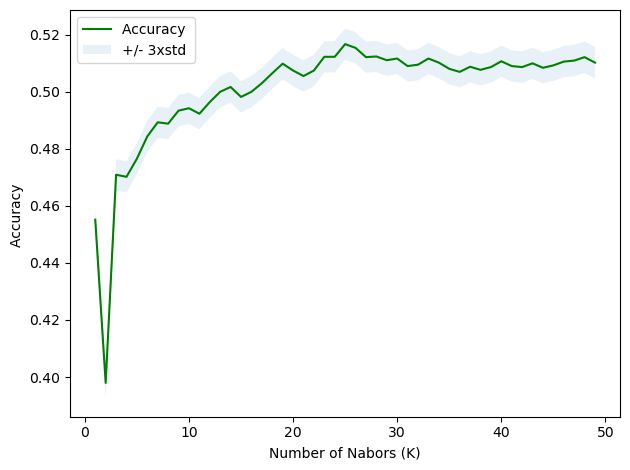

The best accuracy was with 0.5167107477759076 with k= 25


In [45]:
from sklearn.neighbors import KNeighborsClassifier

MAX_K = 50
mean_acc = np.zeros((MAX_K-1))
std_acc = np.zeros((MAX_K-1))
ConfustionMx = [];
for n in range(1,MAX_K):
    
    #Train Model
    model = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    # Predict
    yhat = model.predict(X_test)
    
    # Measure accuracy from model with K = n
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# Now I plot results and choose the best K
plt.plot(range(1,MAX_K),mean_acc,'g')
plt.fill_between(range(1,MAX_K),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)
KNN_K = mean_acc.argmax()+1
KNN = KNeighborsClassifier(n_neighbors = KNN_K).fit(X_train,y_train)
classifier.append("KNeighborsClassifier")
accuracy.append(mean_acc.max())

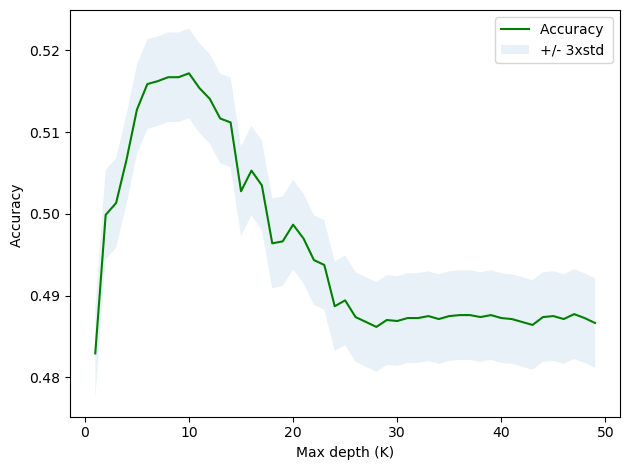

The best accuracy was with 0.5171916326039914 with depth= 10


In [46]:
from sklearn.tree import DecisionTreeClassifier

MAX_DEPTH = 50
mean_acc = np.zeros((MAX_K-1))
std_acc = np.zeros((MAX_K-1))
ConfustionMx = [];
for n in range(1,MAX_DEPTH):
    
    #Train Model
    model = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    # Predict
    yhat = model.predict(X_test)
    
    # Measure accuracy from model with depth = n
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# Now I plot results and choose the best K
plt.plot(range(1,MAX_DEPTH),mean_acc,'g')
plt.fill_between(range(1,MAX_DEPTH),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max depth (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with depth=", mean_acc.argmax()+1)
DT_DEPTH = mean_acc.argmax()+1
DT = DecisionTreeClassifier(criterion="entropy", max_depth = DT_DEPTH).fit(X_train,y_train)
classifier.append("DecisionTreeClassifier")
accuracy.append(mean_acc.max())

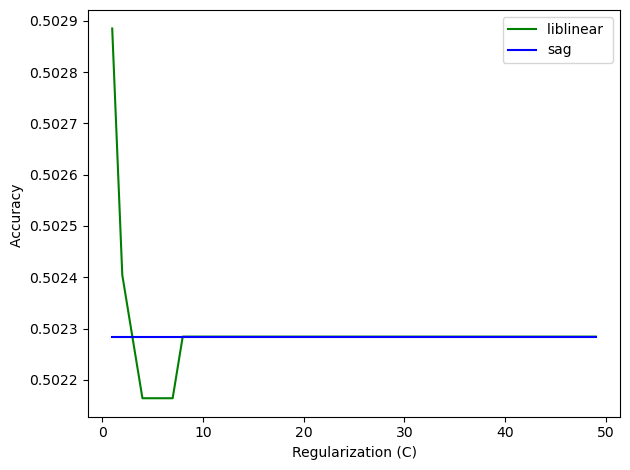

The best accuracy liblinear was with 0.502885308968502 with C= 0.01
The best accuracy sag was with 0.5022842029333975 with C= 0.01


In [47]:
from sklearn.linear_model import LogisticRegression

MAX_C = 50
logloss_liblinear = np.zeros((MAX_C-1))
mean_acc_liblinear = np.zeros((MAX_C-1))
for n in range(1,MAX_C):
    
    #Train Model
    lr = LogisticRegression(C=(n/100), solver='liblinear').fit(X_train,y_train)
    # Predict
    yhat = lr.predict(X_test)
    
    # Measure accuracy from model with C = n
#     logloss_liblinear[n-1] = log_loss(y_test, yhat)
    mean_acc_liblinear[n-1] = metrics.accuracy_score(y_test, yhat)
    
logloss_sag = np.zeros((MAX_C-1))
mean_acc_sag = np.zeros((MAX_C-1))
std_acc_sag = np.zeros((MAX_C-1))
for n in range(1,MAX_C):
    
    #Train Model
    lr = LogisticRegression(C=(n/100), solver='sag').fit(X_train,y_train)
    # Predict
    yhat = lr.predict(X_test)
    
    # Measure accuracy from model with C = n
#     logloss_sag[n-1] = log_loss(y_test, yhat)
    mean_acc_sag[n-1] = metrics.accuracy_score(y_test, yhat)    
    std_acc_sag[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

# Now I plot results and choose the best model
plt.plot(range(1,MAX_C),mean_acc_liblinear,'g')
plt.plot(range(1,MAX_C),mean_acc_sag,'b')
plt.legend(('liblinear ', 'sag'))
plt.ylabel('Accuracy ')
plt.xlabel('Regularization (C)')
plt.tight_layout()
plt.show()

print( "The best accuracy liblinear was with", mean_acc_liblinear.max(), "with C=", (mean_acc_liblinear.argmax()+1)/100)
print( "The best accuracy sag was with", mean_acc_sag.max(), "with C=", (mean_acc_sag.argmax()+1)/100)
classifier.append("LogisticRegression")
accuracy.append(mean_acc_liblinear.max())

In [48]:
from sklearn.ensemble  import RandomForestClassifier
RF = RandomForestClassifier(n_estimators = 200, random_state = 1, class_weight = 'balanced')
RF.fit(X_train,y_train)

yhat = RF.predict(X_test)
mean_acc = metrics.accuracy_score(y_test, yhat)
print( "Accuracy RandomForest was", mean_acc)
classifier.append("RandomForestClassifier")
accuracy.append(mean_acc)

Accuracy RandomForest was 0.47054580427987497


In [49]:
from sklearn.ensemble  import AdaBoostClassifier
AB = AdaBoostClassifier(n_estimators = 200, random_state = 2)
AB.fit(X_train,y_train)

yhat = AB.predict(X_test)
mean_acc = metrics.accuracy_score(y_test, yhat)
print( "Accuracy AdaBoost was", mean_acc)
classifier.append("AdaBoostClassifier")
accuracy.append(mean_acc)

Accuracy AdaBoost was 0.5290935320990623


In [50]:
from sklearn.naive_bayes  import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)

yhat = GNB.predict(X_test)
mean_acc = metrics.accuracy_score(y_test, yhat)
print( "Accuracy GaussianNB was", mean_acc)
classifier.append("GaussianNB")
accuracy.append(mean_acc)

Accuracy GaussianNB was 0.4939889396489541


Text(0.5, 1.0, 'Classifier type')

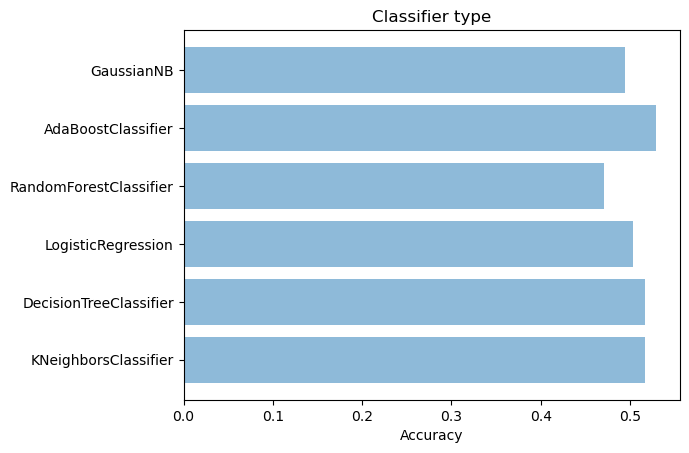

In [53]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(classifier))
plt.barh(y_pos, accuracy, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Accuracy')
plt.title('Classifier type')

Based on resultds we adapt the following classifier for our footbal predictor model:

In [111]:
model  = AdaBoostClassifier(n_estimators = 200, random_state = 2).fit(X_train,y_train)

## Test our model

Is time to test our model, we first test it in an scenario that never occurs, football match between Argentina and Galicia.
<br> We expect to Argentina win this match :)

In [74]:
index = df.index[((df['home_team'] == 'Argentina') & (df['away_team'] == 'Galicia')) | 
                (df['home_team'] == 'Galicia') & (df['away_team'] == 'Argentina')
                ].tolist()
index

[]

We just verify that in our model this match never occurs.
<br> It is time to play our virtual match!

In [112]:
home_team = dic['Argentina']
away_team = dic['Galicia']
print("Argentina team idx", home_team)
print("Galicia team idx", away_team)

Argentina team idx 9
Galicia team idx 40


In [113]:
x1 = [[home_team,away_team]]
yhat = model.predict(x1)
yhat

array(['win'], dtype=object)

Argentina win! Now we could try with another example more realistic

In [114]:
home_team = dic['Paraguay']
away_team = dic['Argentina']
x1 = [[home_team,away_team]]
yhat = model.predict(x1)
yhat

array(['loose'], dtype=object)

## Save model and schema

In this part we are goint to save our model for future use and save the schema dictionary that we have use to test our model

In [119]:
from sklearn.externals import joblib
import sqlite3

In [117]:
# Save model
joblib.dump(model, 'football_predictor_model.pkl')

['football_predictor_model.pkl']

Create schema

In [143]:
conn = sqlite3.connect('football.db')
# The database will be saved in the location where your 'py' file is saved
c = conn.cursor() 
c.execute('''
            DROP TABLE IF EXISTS results;
         ''')
c.execute('''
            DROP TABLE IF EXISTS teams;
         ''')
c.execute('''CREATE TABLE teams(
             [id] INTEGER PRIMARY KEY NOT NULL,
             [country] TEXT NOT NULL
             )
         ''')
c.execute('''CREATE TABLE results(
             [home_team_id] INTEGER REFERENCES teams(id) NOT NULL,
             [away_team_id] INTEGER REFERENCES teams(id) NOT NULL,
             [home_score] INTEGER NOT NULL,
             [away_score] INTEGER NOT NULL,
             [result] TEXT NOT NULL
             )
         ''')

Save dictionary

In [144]:
teams = pd.DataFrame(dic.items(), columns=['country', 'id']) 
teams.head()

,country,id
0,Scotland,1
1,England,2
2,Wales,3
3,Northern Ireland,4
4,United States,5


In [145]:
teams.to_sql('teams', conn, if_exists='replace', index = False)

Save results

In [146]:
results = df[ ['home_team_id', 'away_team_id', 'home_score', 'away_score', 'result'] ]
results.head()

,home_team_id,away_team_id,home_score,away_score,result
0,1,2,0,0,draw
1,2,1,4,2,win
2,1,2,2,1,win
3,2,1,2,2,draw
4,1,2,3,0,win


In [147]:
results.to_sql('results', conn, if_exists='replace', index = False)

## Conclusion

There is a lot of optimization work for this football model, it needs more feature to get better performance.
<br> The idea was compare different classifiers and get a model to use in future works
<br> Next....this model will be use in a API Rest to get your own predictions.